## PCA 주요 성분 분석

PCA 는 입력 데이터의 피처를 줄이는데 사용하는 하나의 기법입니다.

실제로는 피처들의  공분산 매트릭스를 계산해서 고유벡터를 계산하고 

고유치가 큰 것을 우선적으로 피처로 선택하는 방식인데, 구체적인 계산 알고리즘을 몰라도

사이킷런 모듈을 쓰면 쉽게 사용할 수 있습니다.

예를 들어 피처에 어떤 길이가 미터로 나와있는 것과 인치로 나와있는 것이 있다면 

두 피처 중에서 하나는 필요 없을 것 입니다.  이런 선형관계를 쉽게 골라내어 주는 알고리즘입니다.


## 데이터 로딩,  사이킷런 숫자 이미지

이번 실습에서는 사이킷런에서 제공하는숫자 이미지를 사용하겠습니다.

아래의 이미지는 8 x 8 크기의 그레이스케일 입니다.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, NMF

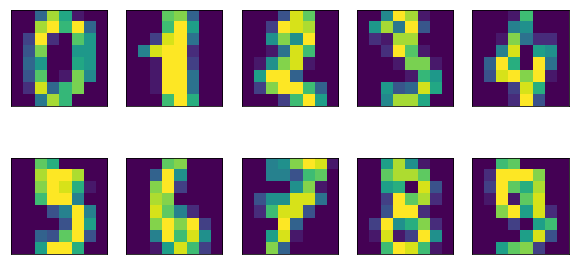

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
    
plt.show()

이미지에는 64 개의 피처(픽셀)가 있습니다.

이 피처를 모두 사용할 필요는 없어보입니다. 모서리나 가장자리에 있는 픽셀은 숫자와 상관없기 때문입니다.

그러면 이 64개의 피처를 PCA 로 2 개의 피처만 사용해보겠습니다.

조금 더 많이 사용하는 것이 분류 성능을 높이겠지만 2차우너 그래프로 그려보기 위해서 우선 2 개의 피처를 

추출합니다.

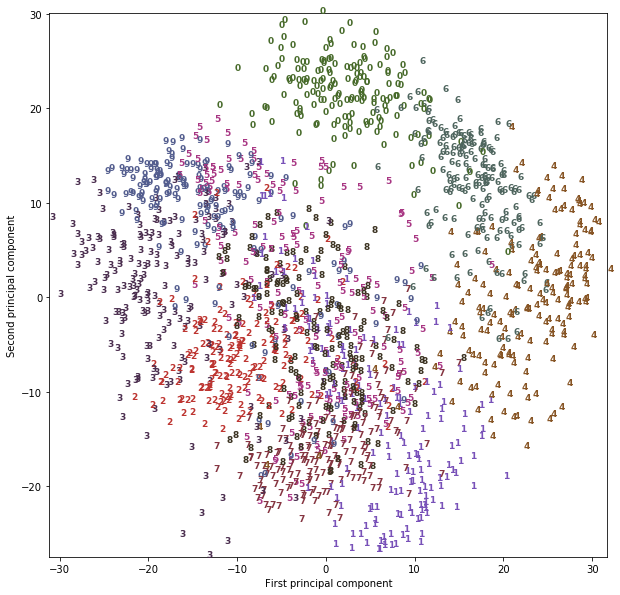

In [11]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

0, 6, 4 숫자는 어느정도 분리가 되어있지만 나머지 숫자는 서로 섞여있습니다.

그럼에도 불구하고 두 개의 피처만으로 이런 분리효과가 있다는 것으로 PCA 가 강력한 툴임을 알 수 있습니다.

## PCA로 3 개의 피처 사용해서 분리

PCA 로 가장 고유치가 큰 고유벡터 3개를 골라서 피처를 분리한 결과를 3차원 그래프로 그려봤습니다.

언듯 보기에는 피처가 2개인 것보다 공간상 분리가 더 잘 되어 있다고 느껴집니다.

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# build a PCA model
pca = PCA(n_components=3)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

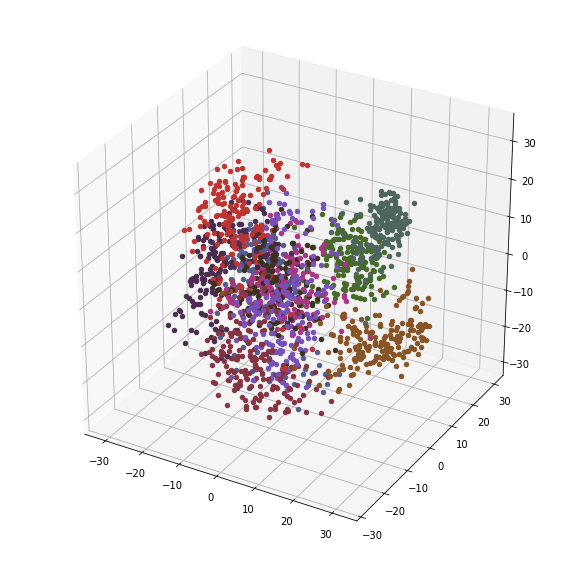

In [19]:
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    ax.scatter(digits_pca[i, 0], digits_pca[i, 1],digits_pca[i, 2] , str(digits.target[i]),
             color = colors[digits.target[i]])
plt.show()

## t-SNE , t-Distributed Stochastic Neighbor Embedding 

t-SNE 알고리즘은 PCA와는 달리 비선형 관계인 피처들을 분리해주기 때문에
고차원 데이터넷을 시각화할 떄 아주 유용하게 사용할 수 있는 차원 축소 알고리즘입니다.



[논문] https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf



In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=137)

digits_tsne = tsne.fit_transform(digits.data)

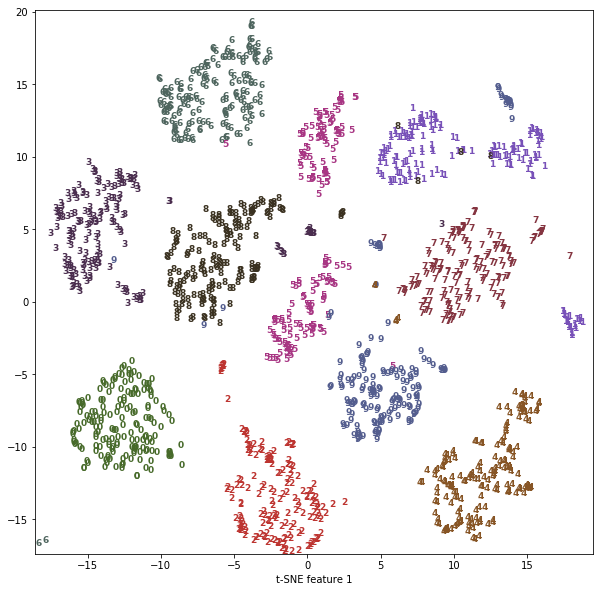

In [26]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()